## Data Set

In [31]:
data = [
    {"label": "confirm", "text": "yes"},
    {"label": "confirm", "text": "yep"},
    {"label": "confirm", "text": "aye"},
    {"label": "confirm", "text": "ya"},
    {"label": "confirm", "text": "yes please"},
    {"label": "confirm", "text": "please"},
    {"label": "reject", "text": "no"},
    {"label": "reject", "text": "nope"},
    {"label": "reject", "text": "nay"},
    {"label": "none", "text": "i don't know"}
]

In [32]:
import pandas as pd
df = pd.DataFrame(data)

In [33]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
label    10 non-null object
text     10 non-null object
dtypes: object(2)
memory usage: 232.0+ bytes


Index([u'label', u'text'], dtype='object')

In [34]:
df['category_id'] = df['label'].factorize()[0]
from io import StringIO
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [41]:
df.head(20)

,label,text,category_id
0,confirm,yes,0
1,confirm,yep,0
2,confirm,aye,0
3,confirm,ya,0
4,confirm,yes please,0
5,confirm,please,0
6,reject,no,1
7,reject,nope,1
8,reject,nay,1
9,none,i don't know,2


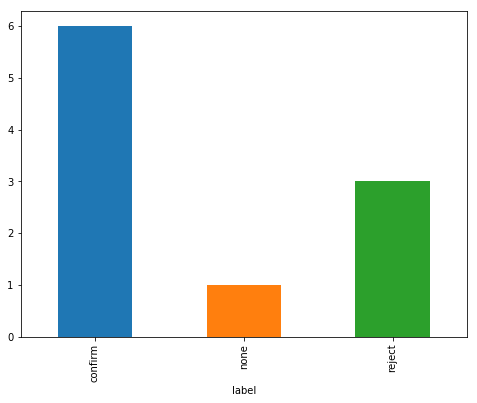

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1')

features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(10, 10)

In [40]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for label, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))


# 'confirm':
  . Most correlated unigrams:
       . no
       . nope
# 'none':
  . Most correlated unigrams:
       . don
       . know
# 'reject':
  . Most correlated unigrams:
       . no
       . nope
